<h1><font color='blue'>Finding the Probability P(Y==1|X)</font></h1>

In [155]:
import sys
print(sys.executable)

from math import exp
import numpy as np
from numpy import dot,exp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tqdm import tqdm
from sklearn.datasets import make_classification

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

C:\Users\magic\anaconda3\envs\ml1\python.exe


<h2><font color='Geen'> Task 1: Implementing Decision Function of SVM RBF Kernel</font></h2>

In [2]:
X, Y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [7]:
svc = SVC(gamma=0.001,C=100,kernel='rbf').fit(X,Y)

In [14]:
svc.decision_function(X)

5000

In [116]:
def dis_fn(X):
    gamma = 0.001
    g = -1*gamma
    vec = svc.support_vectors_
    coef = svc.dual_coef_
    # Y = list(svc.predict(X)[::-1]) # reverse
    result = []
    for q in tqdm(X):
        pt_sum = []
        for v in range(len(svc.support_vectors_)):
            norm = (np.linalg.norm(vec[v]-q)**2)
            kernel = coef[0][v]*exp(g*norm)
            pt_sum.append(kernel)
        result.append(sum(pt_sum)+svc.intercept_[0])
    # list comphrehension
    res = [sum([(coef[0][v]*exp(g*(np.linalg.norm(vec[v]-q)**2))) for v in range(len(svc.support_vectors_))])+svc.intercept_[0] for q in X]
    return result,res


In [117]:
res,_ = dis_fn(X)

100%|██████████| 5000/5000 [00:30<00:00, 165.86it/s]


In [126]:
res[:10]

[-3.923483789714974,
 2.4488237492535254,
 -3.2620508442473786,
 1.563765790696484,
 -2.743964668277935,
 2.4244769730037965,
 -1.3199795780550354,
 0.2925832541720914,
 -3.6810057283927713,
 -2.9499560810538363]

In [127]:
svc.decision_function(X[:10])

array([-3.92348379,  2.44882375, -3.26205084,  1.56376579, -2.74396467,
        2.42447697, -1.31997958,  0.29258325, -3.68100573, -2.94995608])

## I have achived same results

<h2><font color='Geen'> Task2: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## Task


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

## LOgistic regression from scratch

In [167]:
sig = lambda x: 1/(1+np.exp(-x))
acuracy = lambda y,y_pred:(1-((abs(y_pred.round()-y).sum())/len(y)))*100
def cost(y,pred):
    err = (-y*np.log(pred))-((1-y)*np.log(1-pred))
    return (1/len(y))*sum(err)

In [168]:
def LogisticRegression(X,y,alpha,epochs,lamda):
    m=np.zeros(X.shape[1])
    cst = []
    n = X.shape[0]
    c=0

    for i in range(epochs):
        # y_pred = sig((X*m).sum(axis=1)+c) # the below one gives us same result
        y_pred = sig(dot(X,m)+c)
        cst.append(cost(y,y_pred))
        # print(cost(y,y_pred))
        gradient_m = (1/n)*dot(X.T,(y_pred-y))
        gradient_c = (1/n)*sum(y_pred-y)
        #regression # refer BlackBook 242
        reg = 1-((alpha*lamda)/n)
        # Updation
        m = (m*reg)-(alpha*gradient_m)
        c = c-(alpha*gradient_c) # we do not apply regression to the constant

    final_pred = sig(dot(X,m)+c)
    return final_pred,cst

In [161]:
y,cst = LogisticRegression(X,Y,0.001,4000,1000)
acuracy(Y,y),cost(Y,y,n)

100%|██████████| 4000/4000 [00:08<00:00, 466.65it/s]


91.8

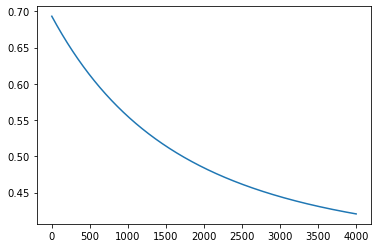

In [162]:
plt.plot(cst)

finding optimal parameters (alpha,lamda,epochs)

In [158]:
params = {
    'alpha':list(np.logspace(-5,5,num=11, base=10.0)),
    # 'learning_rate':list(np.logspace(-5,5,num=11, base=10.0)),
    'max_iter':[100,1000,2000,5000]
}
gs_lr = GridSearchCV(SGDClassifier(loss='log',n_jobs=-1),params,n_jobs=-1)
gs_lr.fit(X,Y)

ValueError: learning rate 1e-05 is not supported. 

In [172]:
fcst = dict()
for a in tqdm([0.001,0.1,1,10,100]):
    for l in [0.01,1,10,100]:
        for e in [1000,2000,4000]:
            y,cst = LogisticRegression(X,Y,a,e,l)
            fcst[str(a) +'-'+ str(l) +'-'+ str(e)] = cost(Y,y)

100%|██████████| 5/5 [05:06<00:00, 61.34s/it]


In [189]:
sorted(fcst.items(),key = lambda item:item[1])[:10]

[('10-0.01-1000', 0.18083745523656317),
 ('10-0.01-2000', 0.18083745523656317),
 ('10-0.01-4000', 0.18083745523656317),
 ('1-0.01-4000', 0.1808374552365632),
 ('1-0.01-2000', 0.18083745523656472),
 ('1-0.01-1000', 0.1808374553538256),
 ('0.1-0.01-4000', 0.18083861488784023),
 ('1-1-4000', 0.18086723734007912),
 ('10-1-1000', 0.18086723734007912),
 ('10-1-2000', 0.18086723734007912)]

I found '1-0.01-1000' to be most balanced

dict_items([('0.001-0.01-1000', 0.5453082762884824), ('0.001-0.01-2000', 0.45795460577878033), ('0.001-0.01-4000', 0.36312856714075054), ('0.001-1-1000', 0.5453183788041591), ('0.001-1-2000', 0.4579828848256879), ('0.001-1-4000', 0.3631934013015692), ('0.001-10-1000', 0.5454101698237874), ('0.001-10-2000', 0.45823973890098096), ('0.001-10-4000', 0.36378211127192916), ('0.001-100-1000', 0.5463231384543176), ('0.001-100-2000', 0.46078574005509154), ('0.001-100-4000', 0.3695999963183817), ('0.1-0.01-1000', 0.182351592768187), ('0.1-0.01-2000', 0.18094954966324828), ('0.1-0.01-4000', 0.18083861488784023), ('0.1-1-1000', 0.1825449824307699), ('0.1-1-2000', 0.18104826842292374), ('0.1-1-4000', 0.18087603408133263), ('0.1-10-1000', 0.18468506053552483), ('0.1-10-2000', 0.1829402753068686), ('0.1-10-4000', 0.18271335283150683), ('0.1-100-1000', 0.2161217646162256), ('0.1-100-2000', 0.21605493535931428), ('0.1-100-4000', 0.21605486105539362), ('1-0.01-1000', 0.1808374553538256), ('1-0.01-2000',


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
